In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dense, Flatten

#Load Dataset

In [35]:
X_train = np.loadtxt("drive/MyDrive/Image-Classification/Copy of input.csv",delimiter=',')
Y_train = np.loadtxt("drive/MyDrive/Image-Classification/Copy of labels.csv",delimiter=',')

X_test = np.loadtxt("drive/MyDrive/Image-Classification/Copy of input_test.csv",delimiter=',')
Y_test = np.loadtxt("drive/MyDrive/Image-Classification/Copy of labels_test.csv",delimiter=',')

In [ ]:
print("shape of X_train", X_train.shape)
print("shape of Y_train", Y_train.shape)
print("shape of X_test", X_test.shape)
print("shape of Y_test", Y_test.shape)

shape of X_train (2000, 30000)
shape of Y_train (2000,)
shape of X_test (400, 30000)
shape of Y_test (400,)


In [36]:
X_train[1,:]

array([131., 128., 135., ...,  71.,  96.,  74.])

In [37]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [38]:
print("shape of X_train", X_train.shape)
print("shape of Y_train", Y_train.shape)
print("shape of X_test", X_test.shape)
print("shape of Y_test", Y_test.shape)

shape of X_train (2000, 100, 100, 3)
shape of Y_train (2000, 1)
shape of X_test (400, 100, 100, 3)
shape of Y_test (400, 1)


In [39]:
X_train = X_train/255.0
X_test = X_test/255.0

In [40]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

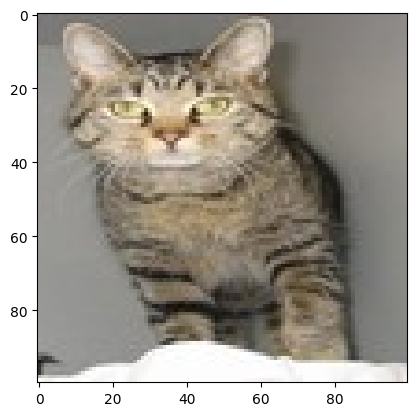

In [41]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# **Model** **Building**


In [42]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 697ms/step - accuracy: 0.5308 - loss: 0.7820
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 707ms/step - accuracy: 0.5517 - loss: 0.6876
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 774ms/step - accuracy: 0.6253 - loss: 0.6464
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 761ms/step - accuracy: 0.6831 - loss: 0.5951
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 743ms/step - accuracy: 0.7435 - loss: 0.5117


In [45]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.4189 - loss: 0.9818


[0.751721978187561, 0.5849999785423279]


# Making Predictions


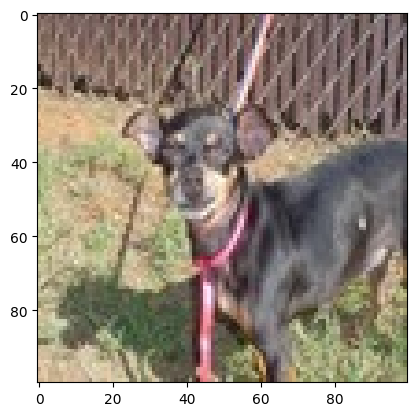

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Our model says it is a : dog


In [58]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)